# Problem Statement

## BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.
Problem Statement:
Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

Problem Statement
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.

About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 

You are provided with following 2 files:

1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.

2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.

 

Dataset Attributes
Here is the description of all the variables :

Variable: Definition
ID: Unique client ID
age: Age of the client
job: Type of job
marital: Marital status of the client
education: Education level
default: Credit in default.
housing: Housing loan
loan: Personal loan
contact: Type of communication
month: Contact month
day_of_week: Day of week of contact
duration: Contact duration
campaign: number of contacts performed during this campaign to the client
pdays: number of days that passed by after the client was last contacted
previous: number of contacts performed before this campaign
poutcome: outcome of the previous marketing campaign
Output variable (desired target):
Subscribed (target): has the client subscribed a term deposit? (YES/NO)

# Importing dependencies

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading the data

In [162]:

train=pd.read_csv('termdeposit_train.csv')
train.head()

ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [163]:
test=pd.read_csv('termdeposit_test.csv')
test.head()

ID  age            job   marital  education default  balance housing  \
0  38441   32       services   married  secondary      no      118     yes   
1  40403   78        retired  divorced    primary      no     2787      no   
2   3709   31  self-employed    single   tertiary      no      144     yes   
3  37422   57       services    single    primary      no     3777     yes   
4  12527   45    blue-collar  divorced  secondary      no     -705      no   

  loan    contact  day month  duration  campaign  pdays  previous poutcome  
0   no   cellular   15   may        20         6     -1         0  unknown  
1   no  telephone    1   jul       372         1     -1         0  unknown  
2   no    unknown   16   may       676         1     -1         0  unknown  
3   no  telephone   13   may        65         2     -1         0  unknown  
4  yes    unknown    3   jul       111         1     -1         0  unknown

### Shape of data

In [164]:
train.shape

(31647, 18)

In [165]:
test.shape

(13564, 17)

#### Coulumns

In [166]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [167]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

######  Here we dont have column 'subscribed'(target)

#### Data info

In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [169]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


## Checking null value

In [170]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

##### we dont have any null value in train dataset

In [171]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

##### we dont have any null value in test dataset as well.

## Checking for Duplicates

In [172]:
## Checking for duplicates on train data
train.duplicated().sum()

0

In [173]:
## Checking for duplicates on test data
test.duplicated().sum()

0

### Replacing whitespaces with null if any

In [174]:
train.replace([' ','  '], ['',''], inplace=True)
test.replace([' ','  '], ['',''], inplace=True)

In [175]:
train.isnull().sum().sum()

0

In [176]:
train.isnull().sum().sum()

0

##### we dont have any whitespaces in our data.

## Data Cleaning

In [177]:
# Droping ID column as it has no relevance in prediction
train.drop('ID', axis=1, inplace=True)
train.head()

age         job   marital  education default  balance housing loan  \
0   56      admin.   married    unknown      no     1933      no   no   
1   31     unknown   married  secondary      no        3      no   no   
2   27    services   married  secondary      no      891     yes   no   
3   57  management  divorced   tertiary      no     3287      no   no   
4   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4         no

In [178]:
test.drop('ID', axis=1, inplace=True)
test.head()

age            job   marital  education default  balance housing loan  \
0   32       services   married  secondary      no      118     yes   no   
1   78        retired  divorced    primary      no     2787      no   no   
2   31  self-employed    single   tertiary      no      144     yes   no   
3   57       services    single    primary      no     3777     yes   no   
4   45    blue-collar  divorced  secondary      no     -705      no  yes   

     contact  day month  duration  campaign  pdays  previous poutcome  
0   cellular   15   may        20         6     -1         0  unknown  
1  telephone    1   jul       372         1     -1         0  unknown  
2    unknown   16   may       676         1     -1         0  unknown  
3  telephone   13   may        65         2     -1         0  unknown  
4    unknown    3   jul       111         1     -1         0  unknown

In [179]:
train.describe()

age        balance           day      duration      campaign  \
count  31647.000000   31647.000000  31647.000000  31647.000000  31647.000000   
mean      40.957247    1363.890258     15.835466    258.113534      2.765697   
std       10.625134    3028.304293      8.337097    257.118973      3.113830   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      73.000000      8.000000    104.000000      1.000000   
50%       39.000000     450.000000     16.000000    180.000000      2.000000   
75%       48.000000    1431.000000     21.000000    318.500000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  31647.000000  31647.000000  
mean      39.576042      0.574272  
std       99.317592      2.422529  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

##### 75% people younger thamn 48 yeras and oldest person is of age 95

In [180]:
test.describe()

age       balance           day      duration      campaign  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean      40.887128   1358.496535     15.738646    258.278679      2.759510   
std       10.604108   3082.940623      8.288174    258.488648      3.060928   
min       18.000000  -3313.000000      1.000000      0.000000      1.000000   
25%       33.000000     71.000000      8.000000    102.000000      1.000000   
50%       39.000000    445.000000     16.000000    180.000000      2.000000   
75%       48.000000   1413.250000     21.000000    319.000000      3.000000   
max       95.000000  98417.000000     31.000000   3253.000000     58.000000   

              pdays      previous  
count  13564.000000  13564.000000  
mean      41.648555      0.594441  
std      101.985178      1.998193  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      850.000000     55.000000

## Data Analysis

##### Age Column

<AxesSubplot:xlabel='age', ylabel='Density'>

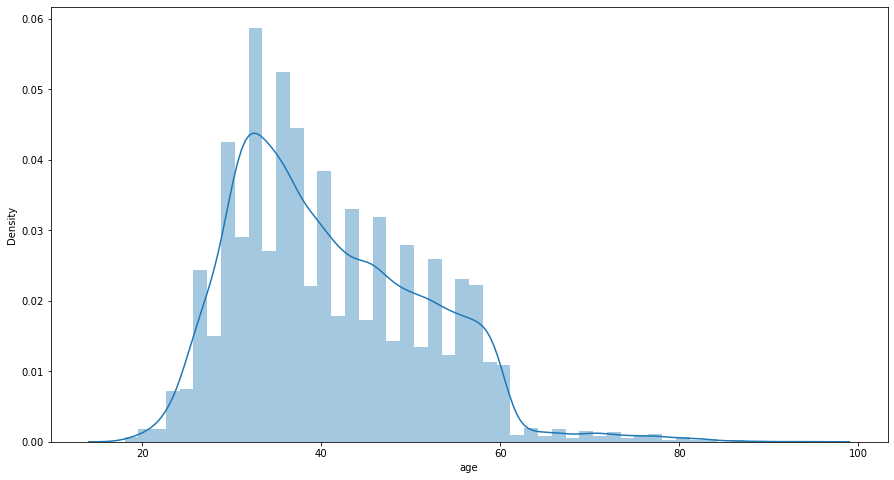

In [21]:
plt.figure(figsize=(15,8))
sns.distplot(train['age'])

#### Majority people are between 30-40 years old.

### Analysis for Balance column

<AxesSubplot:xlabel='balance', ylabel='Density'>

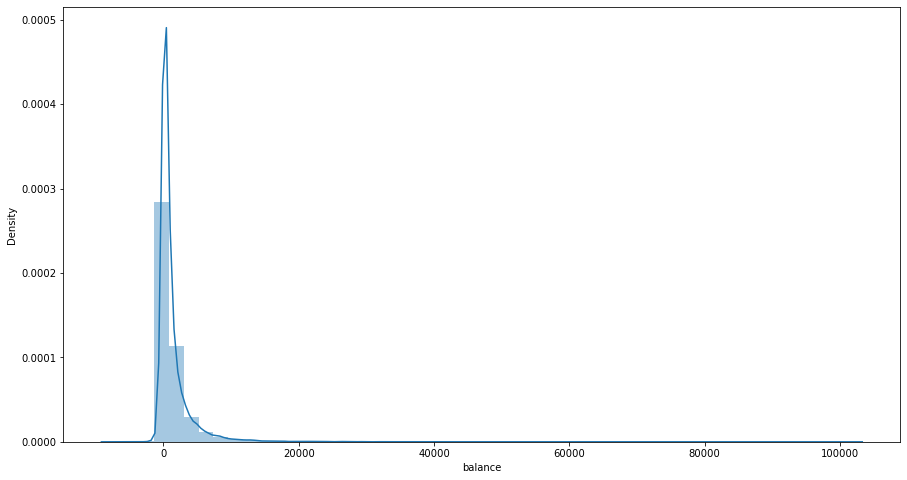

In [22]:
plt.figure(figsize=(15,8))
sns.distplot(train['balance'])

#### Most people have balnce between 0-2000

##### Analysis of Job Column

In [23]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:xlabel='job', ylabel='count'>

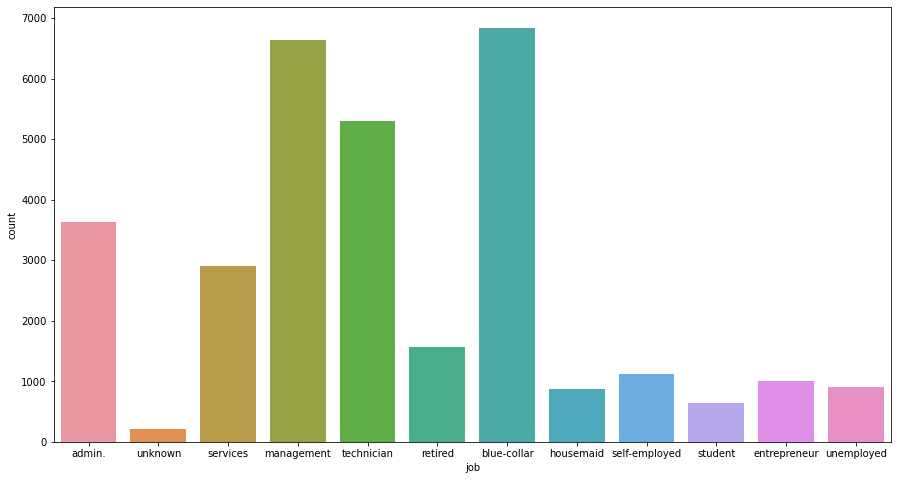

In [24]:
# ploting countplot for job column
plt.figure(figsize=(15,8))
sns.countplot(train['job'])

<AxesSubplot:xlabel='job', ylabel='count'>

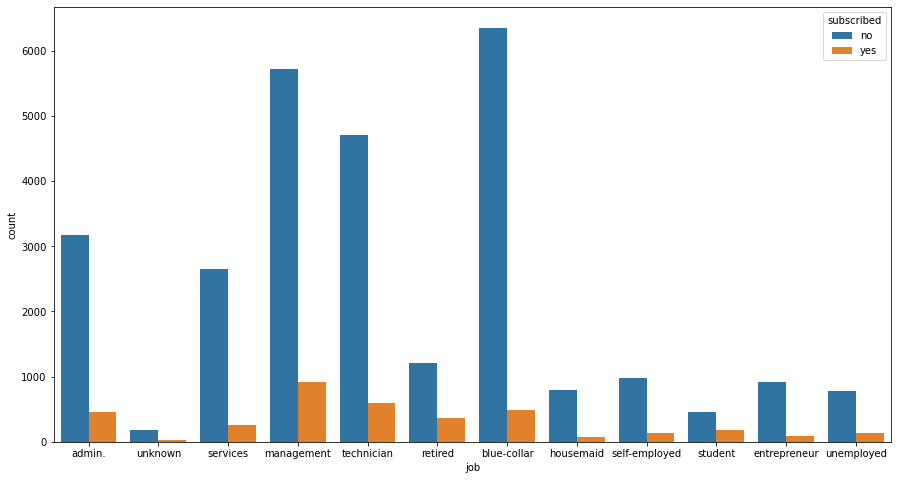

In [25]:
plt.figure(figsize=(15,8))
sns.countplot(train['job'], hue=train['subscribed'])

#### Majority people have blue color jobs followed by managemnet and technician. But people who have subscribed have job as management and technicion.

### Analysis of marital column

In [26]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

<AxesSubplot:xlabel='marital', ylabel='count'>

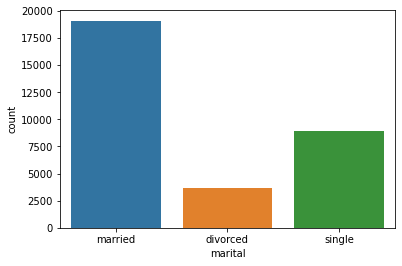

In [27]:
# ploting above data in chart for better understanding
sns.countplot(train['marital'])

<AxesSubplot:xlabel='marital', ylabel='count'>

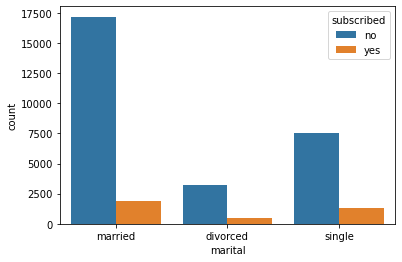

In [181]:
sns.countplot(train['marital'], hue=train['subscribed'])

#### Majority people are married, also majority people who subscribed are also married.

### Analysis of Education column

In [28]:
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

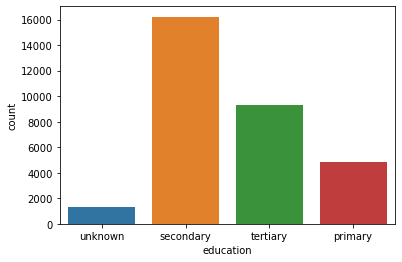

In [29]:
sns.countplot(train['education'])

<AxesSubplot:xlabel='education', ylabel='count'>

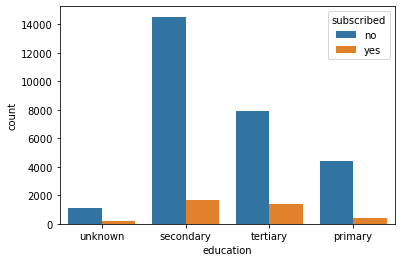

In [182]:
sns.countplot(train['education'], hue=train['subscribed'])

#### Most people have secondary education and majority people who subscribed also have secondary education.

### Analysis of default column

In [30]:
train['default'].value_counts()

no     31062
yes      585
Name: default, dtype: int64

<AxesSubplot:xlabel='default', ylabel='count'>

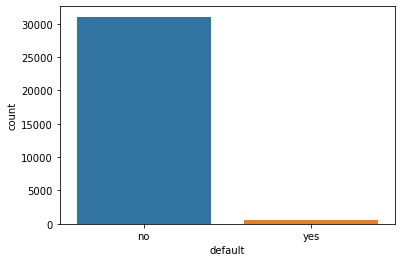

In [31]:
sns.countplot(train['default'])

<AxesSubplot:xlabel='default', ylabel='count'>

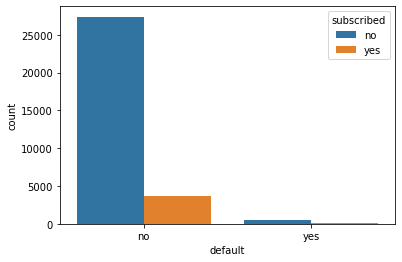

In [183]:
sns.countplot(train['default'], hue=train['subscribed'])

#### Most people have no credit default, also people with no credit default are the majority subscriber.

### Analysis of housing loan column

In [32]:
train['housing'].value_counts()

yes    17584
no     14063
Name: housing, dtype: int64

<AxesSubplot:xlabel='housing', ylabel='count'>

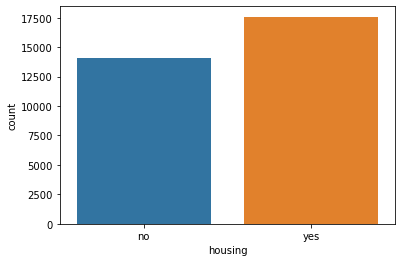

In [33]:
sns.countplot(train['housing'])

#### Majority people have housing loan.

### Analysis of personal loan column

In [34]:
train['loan'].value_counts()

no     26516
yes     5131
Name: loan, dtype: int64

<AxesSubplot:xlabel='loan', ylabel='count'>

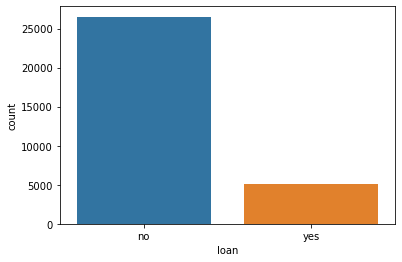

In [35]:
sns.countplot(train['loan'])

#### most people dont have personal loan

### Analysis of contact column

In [36]:
train['contact'].value_counts()

cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

<AxesSubplot:xlabel='contact', ylabel='count'>

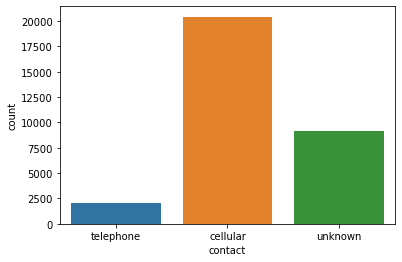

In [37]:
sns.countplot(train['contact'])

<AxesSubplot:xlabel='contact', ylabel='count'>

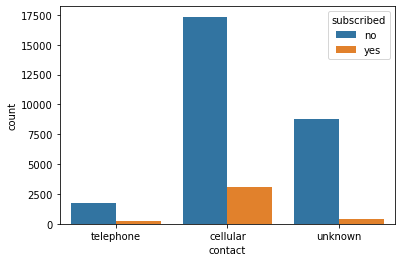

In [38]:
sns.countplot(train['contact'], hue=train['subscribed'])

#### majority people are contacted through cellular contact and most people who subscribed were contacted through cellular

### Analysis of month column

In [39]:
train['month'].value_counts()

may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

<AxesSubplot:xlabel='month', ylabel='count'>

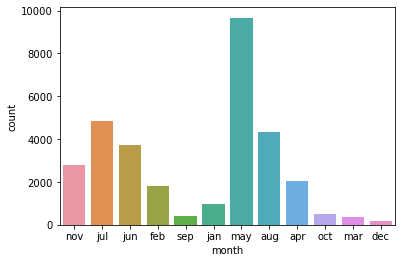

In [40]:
sns.countplot(train['month'])

#### Majority people were contacted in the month May, july, Aug and june

### Analysis of poutcome column

In [41]:
train['poutcome'].value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

<AxesSubplot:xlabel='poutcome', ylabel='count'>

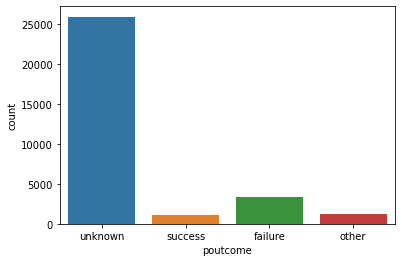

In [42]:
sns.countplot(train['poutcome'])

<AxesSubplot:xlabel='poutcome', ylabel='count'>

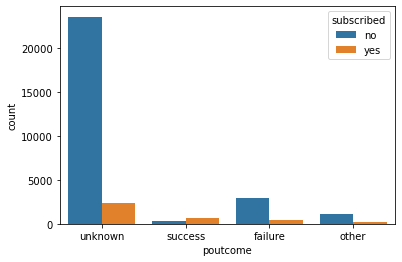

In [43]:
sns.countplot(train['poutcome'],hue=train['subscribed'])

#### For most people outcome of the previous marketing campaign is unknown

## Analysis of Subscribed column

In [44]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:xlabel='subscribed', ylabel='count'>

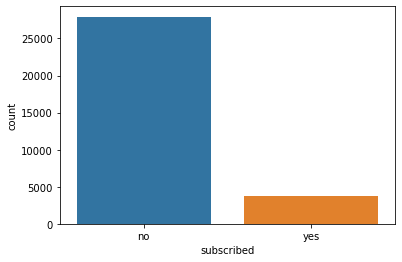

In [45]:
sns.countplot(train['subscribed'])

#### Most people contacted have not subscribed

# Correlation

In [46]:
train.corr()

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.103245 -0.011056 -0.003870  0.005733 -0.021947  0.005761
balance   0.103245  1.000000  0.003461  0.024274 -0.012032  0.001789  0.013843
day      -0.011056  0.003461  1.000000 -0.032288  0.159168 -0.087626 -0.048752
duration -0.003870  0.024274 -0.032288  1.000000 -0.080305  0.000529  0.001783
campaign  0.005733 -0.012032  0.159168 -0.080305  1.000000 -0.087570 -0.033151
pdays    -0.021947  0.001789 -0.087626  0.000529 -0.087570  1.000000  0.428938
previous  0.005761  0.013843 -0.048752  0.001783 -0.033151  0.428938  1.000000

<AxesSubplot:>

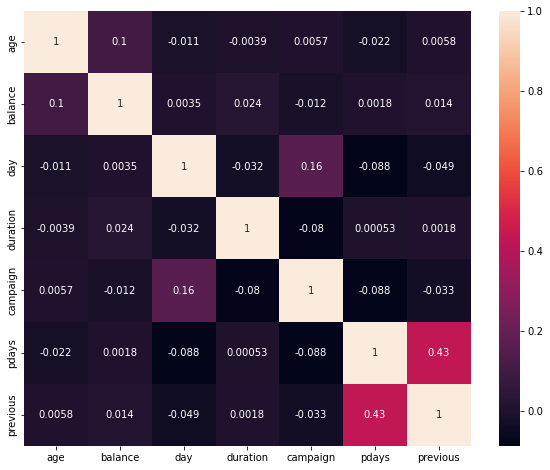

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), annot=True)

# Encoding

In [48]:
train['subscribed'].replace(['yes','no'], [1,0], inplace=True)

### Deviding Data into feature(x) and target(y)

In [49]:
x=train.drop('subscribed',axis=1)
y=train['subscribed']

In [50]:
cat_columns=[i for i in x.columns if x[i].dtypes=='O']

In [51]:
cat_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [52]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
ordinal=OrdinalEncoder()

#using ordinal encoder for independent features
for i in cat_columns:
    x[i]=ordinal.fit_transform(x[i].values.reshape(-1,1))
    train[i]=ordinal.fit_transform(train[i].values.reshape(-1,1))
    test[i]=ordinal.fit_transform(test[i].values.reshape(-1,1))



In [53]:
x

age   job  marital  education  default  balance  housing  loan  \
0       56   0.0      1.0        3.0      0.0     1933      0.0   0.0   
1       31  11.0      1.0        1.0      0.0        3      0.0   0.0   
2       27   7.0      1.0        1.0      0.0      891      1.0   0.0   
3       57   4.0      0.0        2.0      0.0     3287      0.0   0.0   
4       31   9.0      1.0        1.0      0.0      119      1.0   0.0   
...    ...   ...      ...        ...      ...      ...      ...   ...   
31642   29   4.0      2.0        2.0      0.0        0      1.0   0.0   
31643   53   4.0      0.0        2.0      0.0      380      0.0   1.0   
31644   32   4.0      2.0        2.0      0.0      312      0.0   0.0   
31645   57   9.0      1.0        1.0      0.0      225      1.0   0.0   
31646   55   4.0      0.0        1.0      0.0      204      1.0   0.0   

       contact  day  month  duration  campaign  pdays  previous  poutcome  
0          1.0   19    9.0        44         2     -1         0       3.0  
1          0.0   20    5.0        91         2     -1         0       3.0  
2          0.0   18    5.0       240         1     -1         0       3.0  
3          0.0   22    6.0       867         1     84         3       2.0  
4          0.0    4    3.0       380         1     -1         0       3.0  
...        ...  ...    ...       ...       ...    ...       ...       ...  
31642      0.0   12    8.0       116         2     -1         0       3.0  
31643      0.0    5    6.0       438         2     -1         0       3.0  
31644      0.0    7    1.0        37         3     -1         0       3.0  
31645      1.0   15    8.0        22         7    337        12       0.0  
31646      0.0   11    5.0      1973         2     -1         0       3.0  

[31647 rows x 16 columns]

In [54]:
test

age  job  marital  education  default  balance  housing  loan  contact  \
0       32  7.0      1.0        1.0      0.0      118      1.0   0.0      0.0   
1       78  5.0      0.0        0.0      0.0     2787      0.0   0.0      1.0   
2       31  6.0      2.0        2.0      0.0      144      1.0   0.0      2.0   
3       57  7.0      2.0        0.0      0.0     3777      1.0   0.0      1.0   
4       45  1.0      0.0        1.0      0.0     -705      0.0   1.0      2.0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
13559   39  4.0      1.0        2.0      0.0       45      0.0   0.0      0.0   
13560   54  1.0      1.0        0.0      0.0     2281      1.0   0.0      2.0   
13561   35  5.0      1.0        0.0      0.0      285      1.0   0.0      0.0   
13562   29  0.0      2.0        1.0      0.0      464      0.0   0.0      0.0   
13563   29  0.0      1.0        1.0      0.0        2      1.0   0.0      0.0   

       day  month  duration  campaign  pdays  previous  poutcome  
0       15    8.0        20         6     -1         0       3.0  
1        1    5.0       372         1     -1         0       3.0  
2       16    8.0       676         1     -1         0       3.0  
3       13    8.0        65         2     -1         0       3.0  
4        3    5.0       111         1     -1         0       3.0  
...    ...    ...       ...       ...    ...       ...       ...  
13559   28    1.0       148         4     -1         0       3.0  
13560   20    6.0       158         1     -1         0       3.0  
13561   29    4.0       136         1     -1         0       3.0  
13562    9    9.0       208         2     91         3       2.0  
13563    6    8.0       339         1    362         1       0.0  

[13564 rows x 16 columns]

In [55]:
y

0        0
1        0
2        0
3        1
4        0
        ..
31642    0
31643    1
31644    0
31645    0
31646    1
Name: subscribed, Length: 31647, dtype: int64

# Outliers

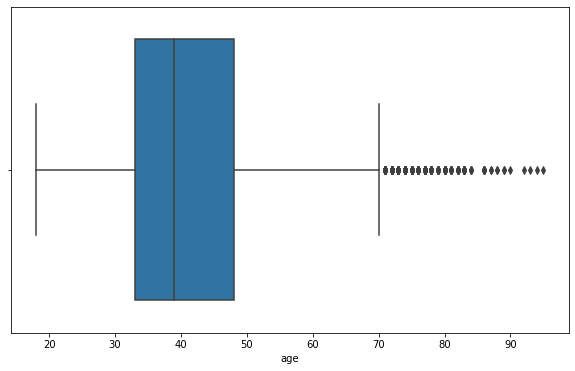

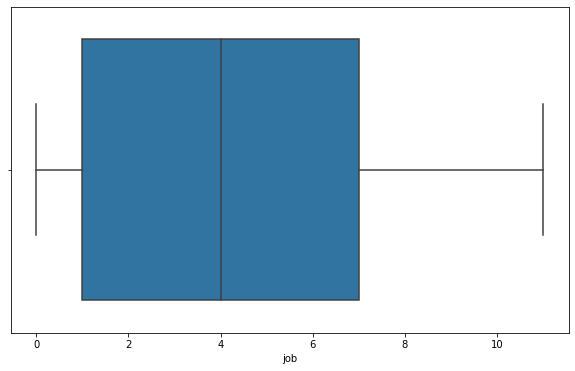

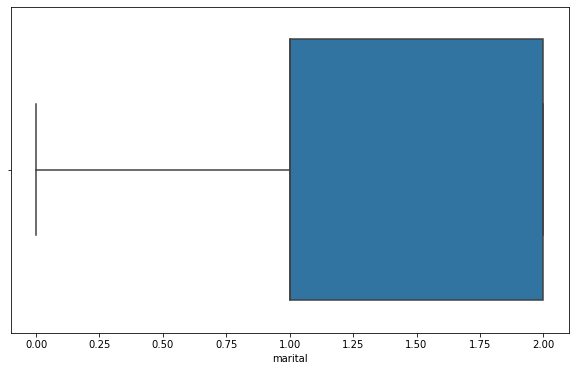

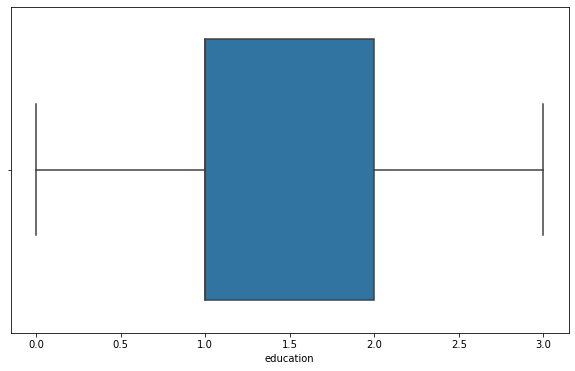

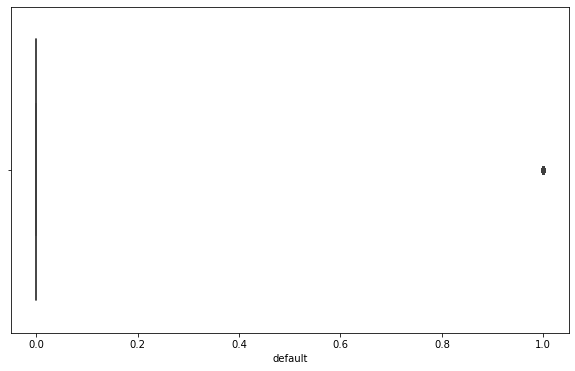

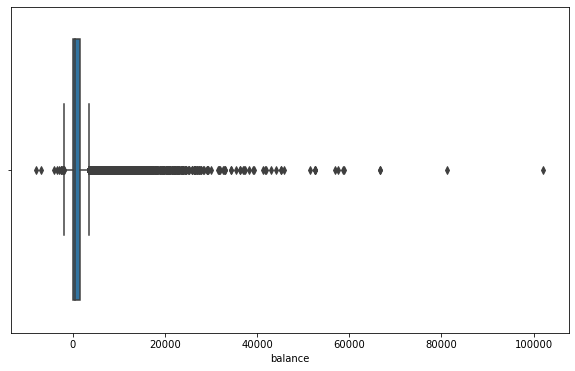

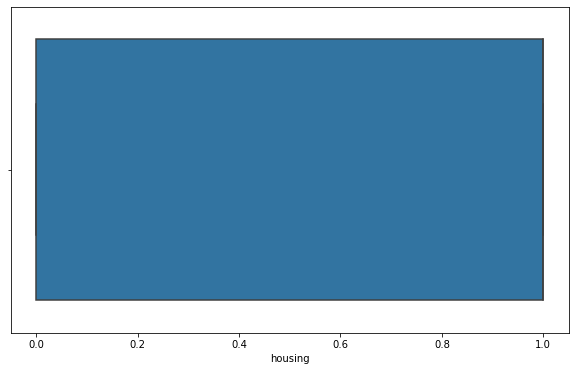

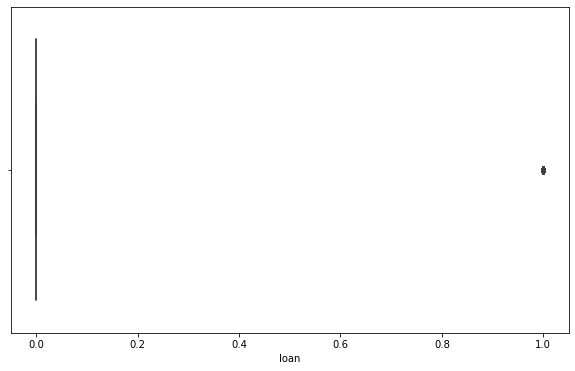

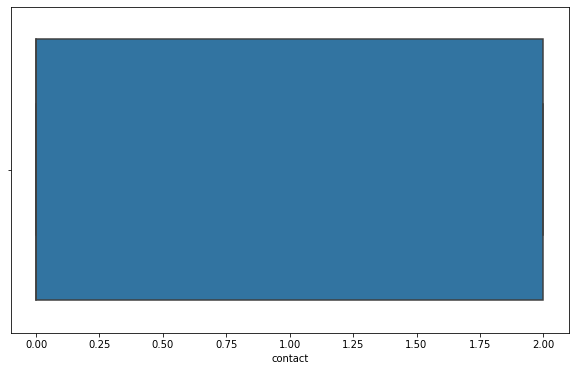

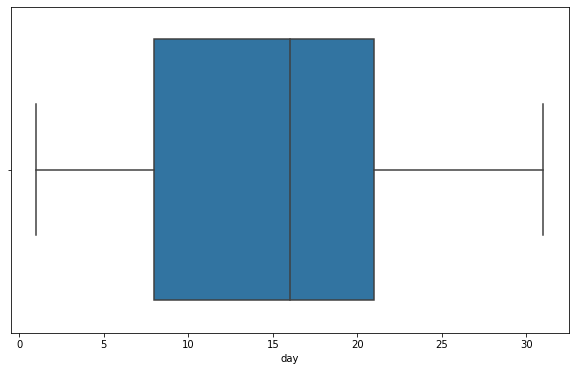

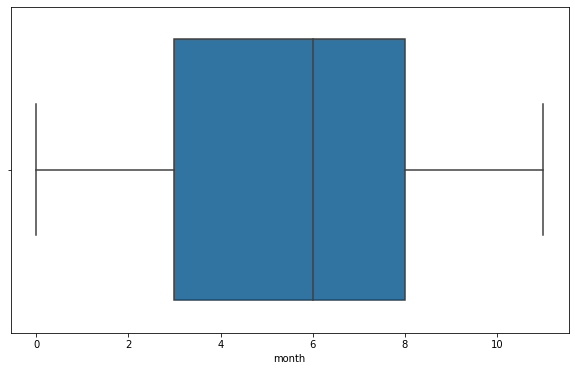

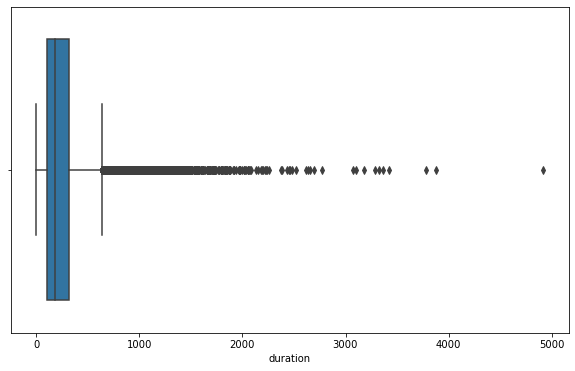

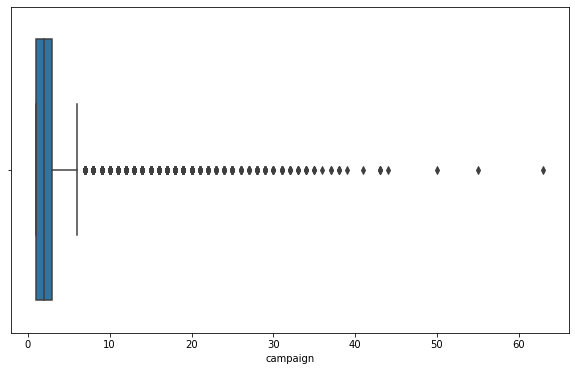

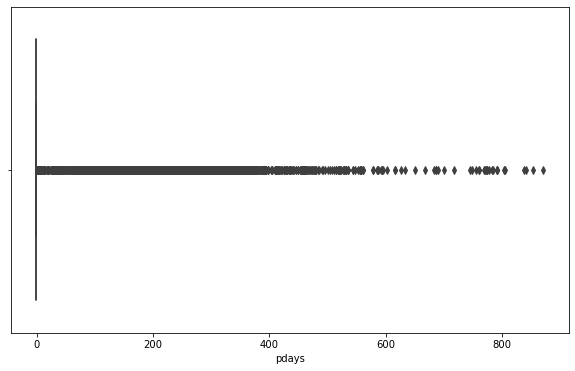

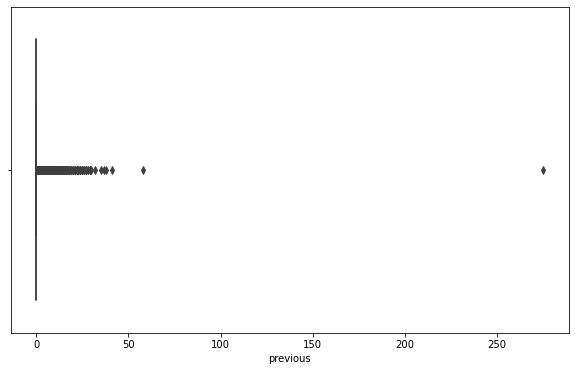

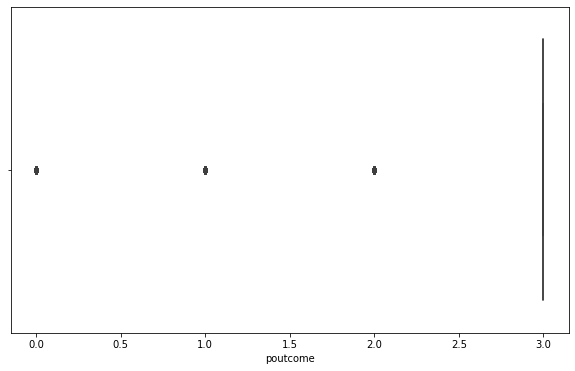

In [56]:
for i in x:
    plt.figure(figsize=(10,6))
    sns.boxplot(train[i])

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(31647, 16)

In [58]:
np.where(z>3)

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64),
 array([ 4, 12,  5, ..., 13, 14, 11], dtype=int64))

In [59]:
nd=train[(z<=3).all(axis=1)]
print(train.shape,'\n',nd.shape)

(31647, 17) 
 (27584, 17)


In [60]:
(31647-27584)/31647*100

12.83849969981357

### Data loss of 13%  is not acceptable. Hence we will not  remove outliers. Also most of the columns are categorical column for which we dont need to remove outlier.

# Skewness

<Figure size 1440x576 with 0 Axes>

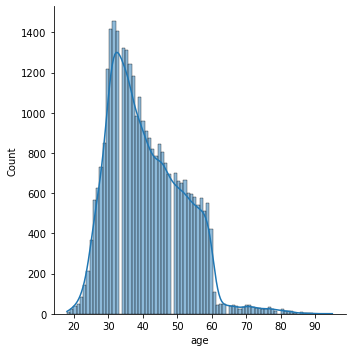

<Figure size 1440x576 with 0 Axes>

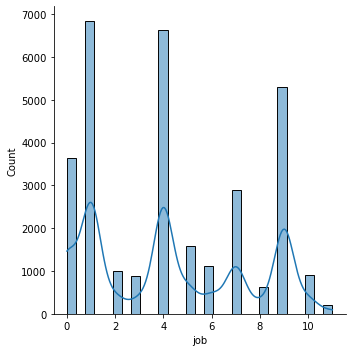

<Figure size 1440x576 with 0 Axes>

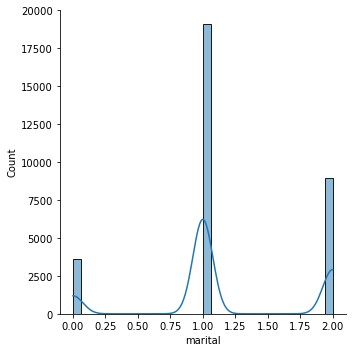

<Figure size 1440x576 with 0 Axes>

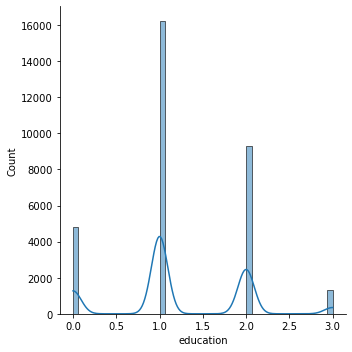

<Figure size 1440x576 with 0 Axes>

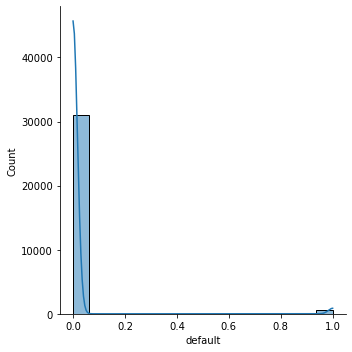

<Figure size 1440x576 with 0 Axes>

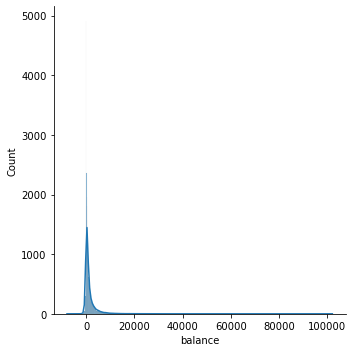

<Figure size 1440x576 with 0 Axes>

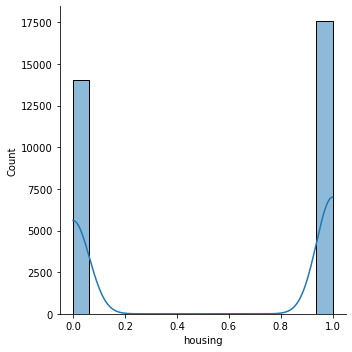

<Figure size 1440x576 with 0 Axes>

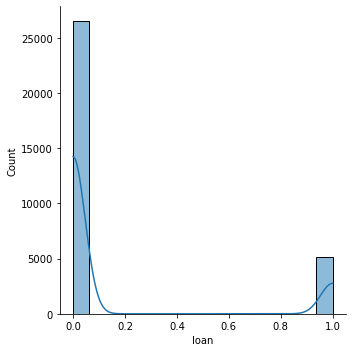

<Figure size 1440x576 with 0 Axes>

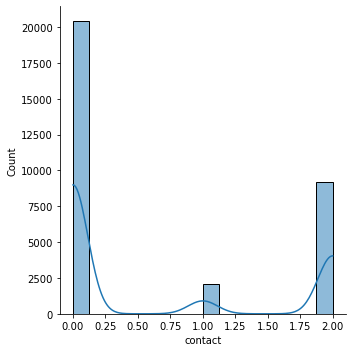

<Figure size 1440x576 with 0 Axes>

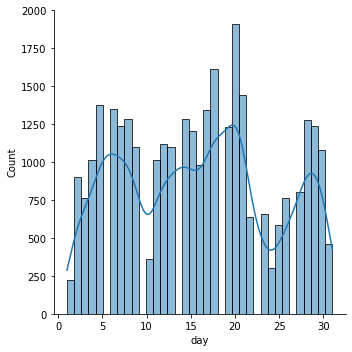

<Figure size 1440x576 with 0 Axes>

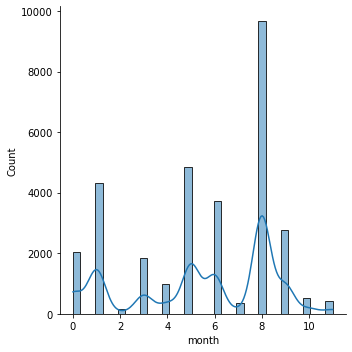

<Figure size 1440x576 with 0 Axes>

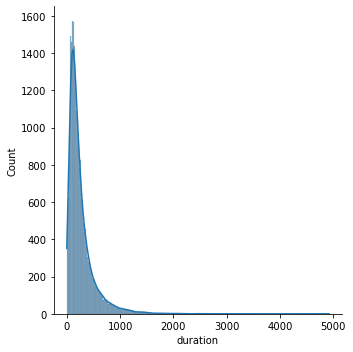

<Figure size 1440x576 with 0 Axes>

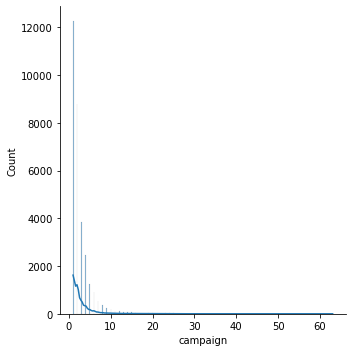

<Figure size 1440x576 with 0 Axes>

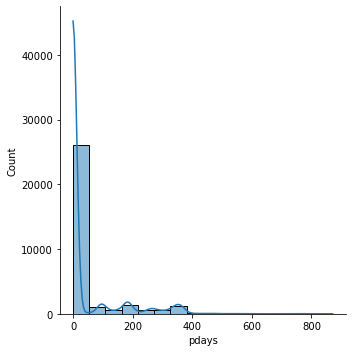

<Figure size 1440x576 with 0 Axes>

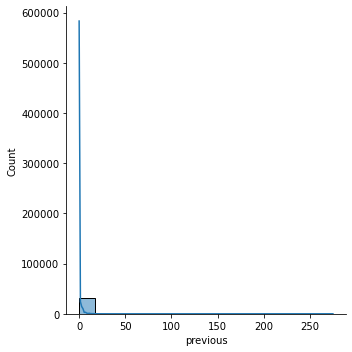

<Figure size 1440x576 with 0 Axes>

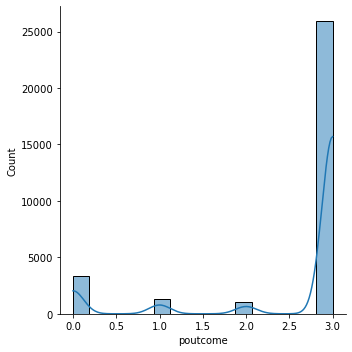

In [61]:
for i in x:
    plt.figure(figsize=(20,8))
    sns.displot(x[i], kde=True)

#### Data is skewed. So we need to remove skewness.

In [62]:
x.skew()

age           0.681607
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance       7.995696
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      3.199766
campaign      4.873935
pdays         2.642374
previous     49.302348
poutcome     -1.996421
dtype: float64

In [63]:
test.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

#### Column 'previuos' has very high skewness for both test and train set.

### Removing skewness

In [64]:
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer()

# removing skewness in train data
xs=pt.fit_transform(x)
x=pd.DataFrame(xs,columns=x.columns)

# removing skewness in train data
ts=pt.fit_transform(test)
test=pd.DataFrame(ts,columns=test.columns)


In [65]:
x.skew()

age          0.008940
job         -0.145894
marital     -0.050323
education   -0.039618
default      7.149903
balance      0.821075
housing     -0.223918
loan         1.833474
contact      0.627828
day         -0.159858
month       -0.383709
duration     0.017331
campaign     0.230683
pdays        1.660825
previous     1.661485
poutcome    -1.698601
dtype: float64

In [66]:
test.skew()

age          0.007857
job         -0.148339
marital     -0.054738
education   -0.039290
default      7.483552
balance      2.258038
housing     -0.226771
loan         1.898587
contact      0.662690
day         -0.153240
month       -0.378233
duration     0.019436
campaign     0.231562
pdays        1.609653
previous     1.610955
poutcome    -1.648855
dtype: float64

# Correlation

#### Checking correlation of feature columns with target, if any column has very weak correlation we can remove that column.

In [67]:
train.corr()['subscribed']

age           0.024538
job           0.038921
marital       0.046043
education     0.066051
default      -0.020168
balance       0.050807
housing      -0.141092
loan         -0.072266
contact      -0.150051
day          -0.029600
month        -0.028088
duration      0.389838
campaign     -0.070607
pdays         0.108290
previous      0.088081
poutcome     -0.080895
subscribed    1.000000
Name: subscribed, dtype: float64

<AxesSubplot:>

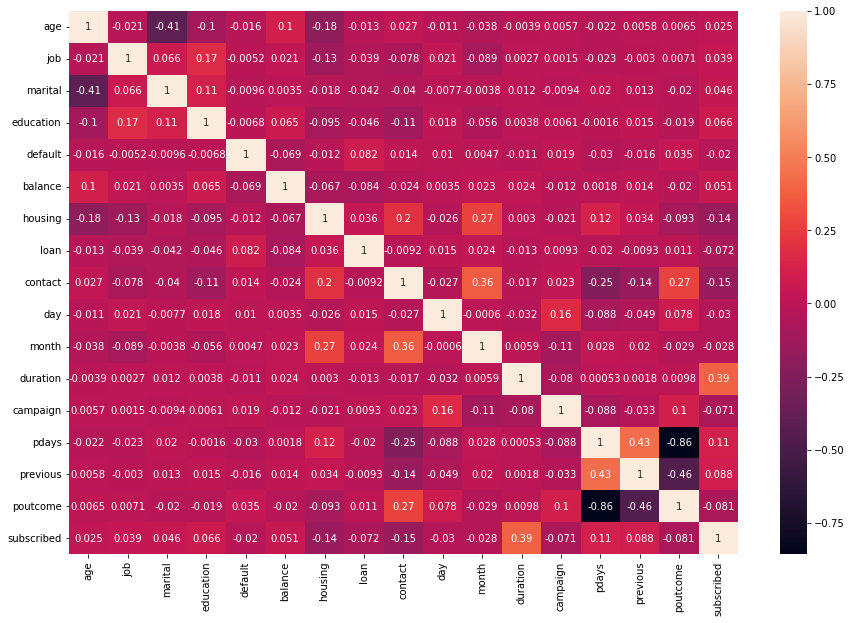

In [68]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), annot=True)

In [69]:
#### every feature column has weak corelation with target, so we will not remove any column.

# Resampling

In [70]:
train['subscribed'].value_counts(normalize=True)*100

0    88.261131
1    11.738869
Name: subscribed, dtype: float64

In [71]:
train['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

#### There is data inbalanced and data is small. Hence we will use oversapling.

#### Handling Data inbalance

In [72]:
#oversampling
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [75]:
y.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

<AxesSubplot:ylabel='count'>

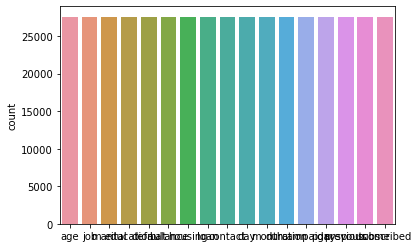

In [76]:
sns.countplot(data=nd)

# Scaling

In [77]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler=StandardScaler()

# scaling train data
xd=scaler.fit_transform(x)
x=pd.DataFrame(xd,columns=x.columns)

# scaling test data
td=scaler.fit_transform(test)
test=pd.DataFrame(td,columns=test.columns)

In [78]:
x

age       job   marital  education   default   balance   housing  \
0      1.260512 -1.708803 -0.348434   2.190069 -0.122506  0.291876 -0.949441   
1     -0.900617  1.650129 -0.348434  -0.343298 -0.122506 -0.527549 -0.949441   
2     -1.436063  0.833109 -0.348434  -0.343298 -0.122506 -0.102197  1.058967   
3      1.321919  0.047375 -1.942426   0.982014 -0.122506  0.755166 -0.949441   
4     -0.900617  1.265180 -0.348434  -0.343298 -0.122506 -0.452494  1.058967   
...         ...       ...       ...        ...       ...       ...       ...   
55859 -1.041725  1.249286  1.303171  -0.343298 -0.122506 -0.096463 -0.949441   
55860 -1.255550 -0.355517 -0.348434   0.677969 -0.122506 -0.356342  1.058967   
55861 -0.744238 -1.096891 -0.348434  -0.343298 -0.122506 -0.459878  1.058967   
55862 -1.479259  0.898058  1.303171  -0.343298 -0.122506  0.145048  1.058967   
55863  0.408987  1.092895 -0.984026  -0.953126 -0.122506 -0.107481  1.058967   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.386216  1.337596  0.485119  1.165089 -1.791423  0.250275 -0.593743   
1     -0.386216 -0.609938  0.596153 -0.185446 -1.128900  0.250275 -0.593743   
2     -0.386216 -0.609938  0.372379 -0.185446 -0.132716 -1.046562 -0.593743   
3     -0.386216 -0.609938  0.813519  0.141790  1.403644 -1.046562  1.666086   
4     -0.386216 -0.609938 -1.505248 -0.813069  0.387038 -1.046562 -0.593743   
...         ...       ...       ...       ...       ...       ...       ...   
55859 -0.386216 -0.609938 -1.865056 -0.185446  0.407696 -1.046562 -0.593743   
55860  2.595892  1.734094 -1.065565  0.662691  2.220783  1.019498 -0.593743   
55861 -0.386216 -0.609938  0.151175 -0.185446  0.008420 -0.041961 -0.593743   
55862 -0.386216 -0.609938  0.189307  0.106846  1.459423 -1.046562 -0.593743   
55863 -0.386216 -0.609938  1.037291 -1.650860  1.642576 -1.046562  1.683178   

       previous  poutcome  
0     -0.593695  0.588428  
1     -0.593695  0.588428  
2     -0.593695  0.588428  
3      1.725775 -1.321185  
4     -0.593695  0.588428  
...         ...       ...  
55859 -0.593695  0.588428  
55860 -0.593695  0.588428  
55861 -0.593695  0.588428  
55862 -0.593695  0.588428  
55863  1.722634 -1.922502  

[55864 rows x 16 columns]

In [79]:
test

age       job   marital  education   default   balance   housing  \
0     -0.830543  0.852310 -0.287967  -0.256082 -0.131336 -0.349877  0.893033   
1      2.549644  0.365121 -1.884603  -1.737907 -0.131336  0.636076 -1.119779   
2     -0.959923  0.618588  1.372809   1.033920 -0.131336 -0.335968  0.893033   
3      1.414890  0.852310  1.372809  -1.737907 -0.131336  0.940270  0.893033   
4      0.520126 -1.023489 -1.884603  -0.256082 -0.131336 -2.747632 -1.119779   
...         ...       ...       ...        ...       ...       ...       ...   
13559 -0.038159  0.086458 -0.287967   1.033920 -0.131336 -0.392516 -1.119779   
13560  1.213253 -1.023489 -0.287967  -1.737907 -0.131336  0.473571  0.893033   
13561 -0.468654  0.365121 -0.287967  -1.737907 -0.131336 -0.266423  0.893033   
13562 -1.233677 -1.613572  1.372809  -0.256082 -0.131336 -0.186352 -1.119779   
13563 -1.233677 -1.613572 -0.287967  -0.256082 -0.131336 -0.424459  0.893033   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.429564 -0.726140 -0.001693  0.835121 -2.060474  1.484674 -0.479134   
1     -0.429564  1.085204 -2.093781 -0.206456  0.802165 -1.105760 -0.479134   
2     -0.429564  1.431917  0.115298  0.835121  1.555360 -1.105760 -0.479134   
3     -0.429564  1.085204 -0.242825  0.835121 -1.058210  0.133392 -0.479134   
4      2.327941  1.431917 -1.691501 -0.206456 -0.537642 -1.105760 -0.479134   
...         ...       ...       ...       ...       ...       ...       ...   
13559 -0.429564 -0.726140  1.386449 -1.476575 -0.240061  1.089247 -0.479134   
13560 -0.429564  1.431917  0.563344  0.134323 -0.170648 -1.105760 -0.479134   
13561 -0.429564 -0.726140  1.483967 -0.539622 -0.328846 -1.105760 -0.479134   
13562 -0.429564 -0.726140 -0.760845  1.193832  0.128628  0.133392  2.063262   
13563 -0.429564 -0.726140 -1.193781  0.835121  0.690713 -1.105760  2.111413   

       previous  poutcome  
0     -0.479073  0.476366  
1     -0.479073  0.476366  
2     -0.479073  0.476366  
3     -0.479073  0.476366  
4     -0.479073  0.476366  
...         ...       ...  
13559 -0.479073  0.476366  
13560 -0.479073  0.476366  
13561 -0.479073  0.476366  
13562  2.141219 -1.524143  
13563  1.984428 -2.216111  

[13564 rows x 16 columns]

# ML Modeling

In [85]:
# Getting the best random stae value
from sklearn.linear_model import LogisticRegression
logr= LogisticRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=i)
    logr.fit(x_train,y_train)
    pred_train=logr.predict(x_train)
    pred_test=logr.predict(x_test) 
    if (accuracy_score(y_train,pred_train)*100>82.3 and accuracy_score(y_test,pred_test)*100>82.3):
                      print("At random state", i ,"the training accuracy is", accuracy_score(y_train,pred_train))
                      print("At random state", i ,"the test accuracy is", accuracy_score(y_test,pred_test))
                      print("\n")

At random state 3 the training accuracy is 0.8239242800563872
At random state 3 the test accuracy is 0.8233240848473999


At random state 5 the training accuracy is 0.8230516211317715
At random state 5 the test accuracy is 0.8260986306274054


At random state 8 the training accuracy is 0.8230068693920476
At random state 8 the test accuracy is 0.8285151705003132


At random state 11 the training accuracy is 0.8238124007070775
At random state 11 the test accuracy is 0.8235030878009487


At random state 14 the training accuracy is 0.8233201315701147
At random state 14 the test accuracy is 0.8261881321041797


At random state 16 the training accuracy is 0.8240809111454208
At random state 16 the test accuracy is 0.8231450818938513


At random state 19 the training accuracy is 0.82361101787832
At random state 19 the test accuracy is 0.8259196276738566


At random state 25 the training accuracy is 0.8238124007070775
At random state 25 the test accuracy is 0.8239505951848205


At random state 

#### At randm state 25 we are receiving best accuracy of the model. Hence we will use random state=25 for our model.

## LogisticRegression

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=25)

logr.fit(x_train,y_train)
pred_test=logr.predict(x_test)

print('Accuracy\n', accuracy_score(y_test,pred_test))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test))
print('classification Report\n',classification_report(y_test,pred_test))

Accuracy
 0.8239505951848205
Confusion matrix
 [[4594 1066]
 [ 901 4612]]
classification Report
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      5660
           1       0.81      0.84      0.82      5513

    accuracy                           0.82     11173
   macro avg       0.82      0.82      0.82     11173
weighted avg       0.82      0.82      0.82     11173



In [105]:
#  Chosing best cross fold value
for j in range(2,10):
    cv_score=cross_val_score(logr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"AT cross fold {j} the cv score is {cv_mean}")
    print('\n')

AT cross fold 2 the cv score is 0.8234999283975368


AT cross fold 3 the cv score is 0.8233926498763576


AT cross fold 4 the cv score is 0.8234641271659745


AT cross fold 5 the cv score is 0.8235894969424175


AT cross fold 6 the cv score is 0.8235538214177757


AT cross fold 7 the cv score is 0.8237507869230958


AT cross fold 8 the cv score is 0.8235357296290993


AT cross fold 9 the cv score is 0.8236972259177505




#### At cv=7 we are getting cross value score nearest to our accuracy score.

In [97]:
# cross validation for logr model
cv_score=cross_val_score(logr,x,y,cv=7)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test)-cv_mean)

cv score is 0.8237507869230958
Difference between accuracy and validation score 0.000199808261724721


#### Predicting output for test data we have.

In [98]:
# predicting for test set we are given
prediction_logr=logr.predict(test)

In [99]:
prediction_logr

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

## Ensemble

In [103]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

## GradientBoostingClassifier

In [106]:
gb=GradientBoostingClassifier()

gb.fit(x_train,y_train)
pred_test_gb=gb.predict(x_test)

print('Accuracy\n', accuracy_score(y_test,pred_test_gb))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_gb))
print('classification Report\n',classification_report(y_test,pred_test_gb))

Accuracy
 0.912646558668218
Confusion matrix
 [[5017  643]
 [ 333 5180]]
classification Report
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      5660
           1       0.89      0.94      0.91      5513

    accuracy                           0.91     11173
   macro avg       0.91      0.91      0.91     11173
weighted avg       0.91      0.91      0.91     11173



In [107]:
# cross validation for GradientBoostingClassifier model
cv_score=cross_val_score(gb,x,y,cv=7)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_gb)-cv_mean)

cv score is 0.9054678936049917
Difference between accuracy and validation score 0.007178665063226286


In [119]:
# predicting for test set we are given
prediction_gb=gb.predict(test)

In [120]:
prediction_gb

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

## AdaBoostClassifier

In [111]:
ad=AdaBoostClassifier()

ad.fit(x_train,y_train)
pred_test_ad=ad.predict(x_test)

print('Accuracy\n', accuracy_score(y_test,pred_test_ad))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_ad))
print('classification Report\n',classification_report(y_test,pred_test_ad))

Accuracy
 0.8774724782958919
Confusion matrix
 [[4921  739]
 [ 630 4883]]
classification Report
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      5660
           1       0.87      0.89      0.88      5513

    accuracy                           0.88     11173
   macro avg       0.88      0.88      0.88     11173
weighted avg       0.88      0.88      0.88     11173



In [112]:
# cross validation for AdaBoostClassifier model
cv_score=cross_val_score(ad,x,y,cv=7)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_ad)-cv_mean)

cv score is 0.8746965212268144
Difference between accuracy and validation score 0.002775957069077517


In [117]:
# predicting for test set we are given
prediction_ad=ad.predict(test)

In [118]:
prediction_ad

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

## RandomForestClassifier

In [115]:
rfc=RandomForestClassifier()

rfc.fit(x_train,y_train)
pred_test_rfc=rfc.predict(x_test)

print('Accuracy\n', accuracy_score(y_test,pred_test_rfc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_rfc))
print('classification Report\n',classification_report(y_test,pred_test_rfc))

Accuracy
 0.9445090843998926
Confusion matrix
 [[5234  426]
 [ 194 5319]]
classification Report
               precision    recall  f1-score   support

           0       0.96      0.92      0.94      5660
           1       0.93      0.96      0.94      5513

    accuracy                           0.94     11173
   macro avg       0.95      0.94      0.94     11173
weighted avg       0.95      0.94      0.94     11173



In [116]:
# cross validation for RandomForestClassifier model
cv_score=cross_val_score(rfc,x,y,cv=7)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_rfc)-cv_mean)

cv score is 0.9429693207547661
Difference between accuracy and validation score 0.001539763645126424


In [121]:
# predicting for test set we are given
prediction_rfc=rfc.predict(test)

In [122]:
prediction_rfc

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

# ExtraTreesClassifier

In [123]:
etc=ExtraTreesClassifier()

etc.fit(x_train,y_train)
pred_test_etc=etc.predict(x_test)

print('Accuracy\n', accuracy_score(y_test,pred_test_etc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_etc))
print('classification Report\n',classification_report(y_test,pred_test_etc))

Accuracy
 0.9621408753244428
Confusion matrix
 [[5315  345]
 [  78 5435]]
classification Report
               precision    recall  f1-score   support

           0       0.99      0.94      0.96      5660
           1       0.94      0.99      0.96      5513

    accuracy                           0.96     11173
   macro avg       0.96      0.96      0.96     11173
weighted avg       0.96      0.96      0.96     11173



In [124]:
# cross validation for ExtraTreesClassifier model
cv_score=cross_val_score(etc,x,y,cv=7)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_etc)-cv_mean)

cv score is 0.9637334605958395
Difference between accuracy and validation score -0.0015925852713967181


In [127]:
# predicting for test set we are given
prediction_etc=etc.predict(test)

In [128]:
prediction_etc

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

# DecisionTreeClassifier

In [126]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)
pred_test_dtc=dtc.predict(x_test)

print('Accuracy\n', accuracy_score(y_test,pred_test_dtc))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_dtc))
print('classification Report\n',classification_report(y_test,pred_test_dtc))

Accuracy
 0.9001163519198067
Confusion matrix
 [[5056  604]
 [ 512 5001]]
classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      5660
           1       0.89      0.91      0.90      5513

    accuracy                           0.90     11173
   macro avg       0.90      0.90      0.90     11173
weighted avg       0.90      0.90      0.90     11173



In [129]:
# cross validation for DecisionTreeClassifier model
cv_score=cross_val_score(dtc,x,y,cv=7)
cv_mean=cv_score.mean()
print(f"cv score is {cv_mean}")
print('Difference between accuracy and validation score', accuracy_score(y_test,pred_test_dtc)-cv_mean)

cv score is 0.9049488462416536
Difference between accuracy and validation score -0.0048324943218469585


In [130]:
# predicting for test set we are given
prediction_dtc=dtc.predict(test)

In [131]:
prediction_dtc

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

# Tuning

#### We will do hepertuning on our best model(ExtraTreesClassifier)

In [132]:
from sklearn.model_selection import GridSearchCV

parameters={
    
    "max_depth":[3,5,8],
    "max_features":["auto", "sqrt", "log2"],
    "criterion":["gini", "entropy"],
    "n_estimators":[50,100,150]
    }

In [133]:
clf=GridSearchCV(ExtraTreesClassifier(),parameters)
clf.fit(x_train, y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


In [134]:
tuned_etc=ExtraTreesClassifier(n_estimators= 100, max_features='sqrt', max_depth= 8, criterion= 'gini')
tuned_etc.fit(x_train, y_train)

pred_test_tuned=tuned_etc.predict(x_test)

print('Accuracy\n',accuracy_score(y_test,pred_test_tuned))
print('Confusion matrix\n',confusion_matrix(y_test,pred_test_tuned))
print('classification Report\n',classification_report(y_test,pred_test_tuned))

Accuracy
 0.8468629732390585
Confusion matrix
 [[4655 1005]
 [ 706 4807]]
classification Report
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      5660
           1       0.83      0.87      0.85      5513

    accuracy                           0.85     11173
   macro avg       0.85      0.85      0.85     11173
weighted avg       0.85      0.85      0.85     11173



In [135]:
# predicting for test set we are given
prediction_tuned_etc=tuned_etc.predict(test)

In [136]:
prediction_tuned_etc

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

# AUC ROC curve

<Figure size 1440x720 with 0 Axes>

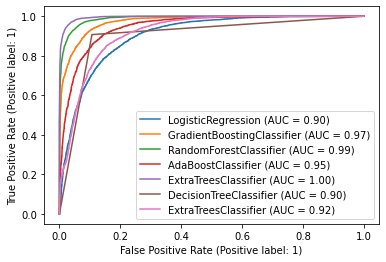

In [142]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(20,10))
disp=plot_roc_curve(logr,x_test, y_test)
plot_roc_curve(gb,x_test, y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test, y_test,ax=disp.ax_)
plot_roc_curve(ad,x_test, y_test,ax=disp.ax_)
plot_roc_curve(etc,x_test, y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test, y_test,ax=disp.ax_)
plot_roc_curve(tuned_etc,x_test, y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

# Model Saving

#### Since ExtraTreesClassifier is providing the best result(minimum difference between accuracy and validation score). So we will save the ExtraTreesClassifier model.

In [144]:
import pickle
filename='term_deposit.pkl'
pickle.dump(etc, open(filename,'wb'))

# Conclusion

In [145]:
loaded_model=pickle.load(open('term_deposit.pkl','rb'))


original=np.array(y_test)
predicted=np.array(loaded_model.predict(x_test))

In [146]:
accuracy_score(y_test,loaded_model.predict(x_test))

0.9621408753244428

In [147]:
df=pd.DataFrame({'Original':original,'Predicted':predicted})
df

Original  Predicted
0             0          0
1             0          0
2             0          0
3             1          1
4             0          0
...         ...        ...
11168         1          1
11169         0          0
11170         0          0
11171         0          1
11172         1          1

[11173 rows x 2 columns]

# Lets make data frame for results on test data for all the model

In [148]:
df=pd.DataFrame({'LogisticRegression':prediction_logr,
                 'GradientBoostingClassifier':prediction_gb, 
                 'AdaBoostClassifier':prediction_ad,
                 'RandomForestClassifier':prediction_rfc, 
                 'ExtraTreesClassifier':prediction_etc,
                'DecisionTreeClassifier':prediction_dtc,
                'tuned_etc':prediction_tuned_etc})
df

LogisticRegression  GradientBoostingClassifier  AdaBoostClassifier  \
0                       0                           0                   0   
1                       1                           1                   1   
2                       1                           1                   1   
3                       0                           1                   1   
4                       0                           0                   0   
...                   ...                         ...                 ...   
13559                   0                           1                   1   
13560                   0                           1                   1   
13561                   0                           1                   1   
13562                   1                           1                   1   
13563                   1                           1                   1   

       RandomForestClassifier  ExtraTreesClassifier  DecisionTreeClassifier  \
0                           0                     0                       0   
1                           1                     1                       0   
2                           1                     1                       1   
3                           0                     0                       0   
4                           0                     0                       1   
...                       ...                   ...                     ...   
13559                       1                     1                       1   
13560                       1                     1                       1   
13561                       1                     1                       1   
13562                       1                     1                       1   
13563                       1                     1                       1   

       tuned_etc  
0              0  
1              1  
2              1  
3              0  
4              0  
...          ...  
13559          1  
13560          0  
13561          0  
13562          1  
13563          1  

[13564 rows x 7 columns]

# Building a Predictive System

In [155]:
test

age       job   marital  education   default   balance   housing  \
0     -0.830543  0.852310 -0.287967  -0.256082 -0.131336 -0.349877  0.893033   
1      2.549644  0.365121 -1.884603  -1.737907 -0.131336  0.636076 -1.119779   
2     -0.959923  0.618588  1.372809   1.033920 -0.131336 -0.335968  0.893033   
3      1.414890  0.852310  1.372809  -1.737907 -0.131336  0.940270  0.893033   
4      0.520126 -1.023489 -1.884603  -0.256082 -0.131336 -2.747632 -1.119779   
...         ...       ...       ...        ...       ...       ...       ...   
13559 -0.038159  0.086458 -0.287967   1.033920 -0.131336 -0.392516 -1.119779   
13560  1.213253 -1.023489 -0.287967  -1.737907 -0.131336  0.473571  0.893033   
13561 -0.468654  0.365121 -0.287967  -1.737907 -0.131336 -0.266423  0.893033   
13562 -1.233677 -1.613572  1.372809  -0.256082 -0.131336 -0.186352 -1.119779   
13563 -1.233677 -1.613572 -0.287967  -0.256082 -0.131336 -0.424459  0.893033   

           loan   contact       day     month  duration  campaign     pdays  \
0     -0.429564 -0.726140 -0.001693  0.835121 -2.060474  1.484674 -0.479134   
1     -0.429564  1.085204 -2.093781 -0.206456  0.802165 -1.105760 -0.479134   
2     -0.429564  1.431917  0.115298  0.835121  1.555360 -1.105760 -0.479134   
3     -0.429564  1.085204 -0.242825  0.835121 -1.058210  0.133392 -0.479134   
4      2.327941  1.431917 -1.691501 -0.206456 -0.537642 -1.105760 -0.479134   
...         ...       ...       ...       ...       ...       ...       ...   
13559 -0.429564 -0.726140  1.386449 -1.476575 -0.240061  1.089247 -0.479134   
13560 -0.429564  1.431917  0.563344  0.134323 -0.170648 -1.105760 -0.479134   
13561 -0.429564 -0.726140  1.483967 -0.539622 -0.328846 -1.105760 -0.479134   
13562 -0.429564 -0.726140 -0.760845  1.193832  0.128628  0.133392  2.063262   
13563 -0.429564 -0.726140 -1.193781  0.835121  0.690713 -1.105760  2.111413   

       previous  poutcome  
0     -0.479073  0.476366  
1     -0.479073  0.476366  
2     -0.479073  0.476366  
3     -0.479073  0.476366  
4     -0.479073  0.476366  
...         ...       ...  
13559 -0.479073  0.476366  
13560 -0.479073  0.476366  
13561 -0.479073  0.476366  
13562  2.141219 -1.524143  
13563  1.984428 -2.216111  

[13564 rows x 16 columns]

In [ ]:
testcsv=test.to_csv()

In [160]:
testcsv

',age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome\r\n0,-0.8305429699632357,0.8523104612088603,-0.2879672591742842,-0.2560820277448387,-0.13133597200737818,-0.34987665437298054,0.8930333777833528,-0.4295641616375944,-0.7261395910799681,-0.0016934212134216053,0.8351205052311078,-2.0604737998914113,1.484674098575364,-0.4791341542130769,-0.47907256140431714,0.4763663613286126\r\n1,2.5496443006017597,0.36512074540770567,-1.8846034729883856,-1.7379074499444418,-0.13133597200737818,0.6360759714680675,-1.1197789745352575,-0.4295641616375944,1.0852041983883653,-2.093780670613281,-0.20645577318853772,0.8021648302340603,-1.1057597222971465,-0.4791341542130769,-0.47907256140431714,0.4763663613286126\r\n2,-0.9599233890659654,0.6185878175038054,1.372809166013107,1.0339203207327763,-0.13133597200737818,-0.3359678550569782,0.8930333777833528,-0.4295641616375944,1.431917421216516,0.11529769749790336,0.8351205052311078,1.555359737184184,

In [156]:
input_data=(-0.830543,0.852310,0.287967,0.256082,0.131336,
            0.349877,0.893033,0.429564,0.726140,0.001693,0.835121,
            2.060474,1.484674,0.479134,0.479073,0.476366)
ar_data=np.asarray(input_data)
reshaped=ar_data.reshape(1,-1)
pred=loaded_model.predict(reshaped)

if pred[0]==1:
    print('Person will subcribe to term deposit')
else:
    print('Person will not subcribe to term deposit')
    

Person will subcribe to term deposit


In [159]:
input_data=(1.4148903595173163,0.8523104612088603,1.372809166013107,-1.7379074499444418,
            -0.13133597200737818,0.9402695721808009,0.8930333777833528,-0.4295641616375944,
            1.0852041983883653,-0.24282541194612356,0.8351205052311078,
            -1.0582101567942974,0.13339206173577844,-0.4791341542130769,-0.47907256140431714,0.4763663613286126)
ar_data=np.asarray(input_data)
reshaped=ar_data.reshape(1,-1)
pred=loaded_model.predict(reshaped)

if pred[0]==1:
    print('Person will subcribe to term deposit')
else:
    print('Person will not subcribe to term deposit')
    

Person will not subcribe to term deposit
